# **EDA: SuperCenter**

# **0. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

# **1. Loading the datasets & pre-processing**

In [2]:
# connecting to google drive where we have the datasets stored
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Now that we are connected to the drive where the datasets are stored, we'll print all files in the directory.

In [3]:
# Define the directory containing datasets:
path = '/content/drive/Shareddrives/CAPSTONE PROJECT/2_Data Analysis/datasets/'

# Get list of files in directory
files = os.listdir(path)
files


['tabla_departamento.xlsx',
 'tabla_pasillos.xlsx',
 'tabla_producto.xlsx',
 'all_orders.csv']

## 1.1 Orders dataset

The first dataset we'll load is the `all_orders.csv`.
This file is the result of concatenating all `tabla_ordenes_X.xlsx`(1-5) files into a single one. This step has been omitted for simplicity.

In [4]:
#loading the all_orders.csv dataset
orders = pd.read_csv(path + 'all_orders.csv')

#dropping unnecessary columns (generated when we concatenated all orders into one csv file)
orders = orders.drop(columns='Unnamed: 0', axis=1)

#printing the first few rows
orders.head()

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado
0,0,1,49302,1,1
1,1,1,11109,2,1
2,2,1,10246,3,0
3,3,1,49683,4,0
4,4,1,43633,5,1


In [5]:
#counting number of rows: total_products
total_products_sold = len(orders)
print(f"The orders dataset contains {total_products_sold} records.")

The orders dataset contains 1384615 records.


In [6]:
#total orders
total_orders = orders["id_orden"].nunique()
print(f'Total number of unique orders: {total_orders} ')

Total number of unique orders: 131209 


Upon an initial inspection we observe that we have **~1.38M products sold** for **131K baskets**.

In [7]:
#Counting null values
orders.isnull().sum()

id_linea                  0
id_orden                  0
id_producto               0
incluido_orden_carrito    0
reordenado                0
dtype: int64

In [8]:
# inspecting the data types
orders.dtypes

id_linea                  int64
id_orden                  int64
id_producto               int64
incluido_orden_carrito    int64
reordenado                int64
dtype: object

The dataset contains no null values and the data types are in the correct form.

## 1.2 Product, Department and Aisle datasets

The next datasets we'll load are the `tabla_producto.csv`,  `tabla_departamento.csv` and `tabla_pasillos.csv`.

These datasets contain information on the different products that Supercenter commercializes online and offline. Departments and aisles help categorize the products into categories as well as the location in the retail stores where they can be found.

In [9]:
#Loading Department, Pasillos and Product datasets

department = pd.read_excel(path + 'tabla_departamento.xlsx')

pasillo = pd.read_excel(path+ 'tabla_pasillos.xlsx')

products = pd.read_excel(path +'tabla_producto.xlsx')

In [10]:
#printing first few rows
products.head()

,id_producto,nombre_producto,id_pasillo,id_departamento
0,1,GALLETAS DEL EMPAREDADO DEL CHOCOLATE,61,19
1,2,TODAS ESTACIONES DE SALT,104,13
2,3,ROBUSTA DE ORO SIN AZÚCAR TÉ OOLONG,94,7
3,4,SALSA INTELIGENTES ONES FAVORITOS MINI CLÁSICO...,38,1
4,5,EN CUALQUIER MOMENTO SALSA VERDE CHILE,5,13


In [11]:
#printing first few rows
department.head()

,id_departamento,departamento
0,1,CONGELADOS
1,2,OTROS
2,3,PANADERÍA
3,4,FRUTAS Y VERDURAS
4,5,BEBIDAS ALCOHOLICAS


In [12]:
#printing first few rows
pasillo.head()

,id_pasillo,pasillo
0,1,SOPAS PREPARADAS ENSALADAS
1,2,QUESOS DE ESPECIALIDAD
2,3,BARRAS DE GRANOLA DE ENERGÍA
3,4,ALIMENTOS INSTANTÁNEOS
4,5,PREPARACIÓN DE LA CARNE MARINADOS


In [13]:
#Counting number of unique values in each dataset

# Unique number of products
print(f"Unique number of products: {products['nombre_producto'].nunique()}", '\n')

# Unique number of departments
print(f"Unique number of departments: {department['departamento'].nunique()}", '\n')

# Unique number of pasillos
print(f"Unique number of pasillos: {pasillo['pasillo'].nunique()}")

Unique number of products: 48793 

Unique number of departments: 21 

Unique number of pasillos: 134


In [14]:
#Counting number of Null values
print("Number of null values in products df:")
print(products.isnull().sum(), '\n')

print("Number of null values in department df:")
print(department.isnull().sum(),  '\n')

print("Number of null values in pasillos df:")
print(pasillo.isnull().sum(),  '\n')

Number of null values in products df:
id_producto        0
nombre_producto    0
id_pasillo         0
id_departamento    0
dtype: int64 

Number of null values in department df:
id_departamento    0
departamento       0
dtype: int64 

Number of null values in pasillos df:
id_pasillo    0
pasillo       0
dtype: int64 



## 1.3 Merging all datasets

We'll now proceed to merge all four dataframes, using their primary/foreign keys, into one so we can start our analysis.

Note that we'll do a left join, as we want to keep all orders. In case a product_id is not found in the `products` we'll still see the item in the order. If all products exist in the products dataframe doing a left join would be the equivalente than an inner join.

We'll follow the same logic for `departments` and `pasillos`.



In [15]:
#Merging orders with pasillo and department using the PRODUCTS dataset

merged_orders = orders.merge(products, how='left', on='id_producto'). \
                merge(department, how='left', on='id_departamento'). \
                merge(pasillo, how='left', on='id_pasillo')

In [16]:
#making sure we have the same number of rows
assert len(orders) == len(merged_orders)

In [17]:
#printing first few rows of the merged dataframe
merged_orders.head()

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,departamento,pasillo
0,0,1,49302,1,1,EL YOGUR DE BULGARIA,120.0,16.0,HUEVOS Y LÁCTEOS,YOGUR
1,1,1,11109,2,1,4% ORGÁNICO QUESO GRASA DE LECHE LECHE ENTERA ...,108.0,16.0,HUEVOS Y LÁCTEOS,OTROS QUESOS CREMAS
2,2,1,10246,3,0,CORAZONES DE APIO ORGÁNICOS,83.0,4.0,FRUTAS Y VERDURAS,VEGETALES FRESCOS
3,3,1,49683,4,0,KIRBY PEPINO,83.0,4.0,FRUTAS Y VERDURAS,VEGETALES FRESCOS
4,4,1,43633,5,1,LAS SARDINAS LIGERAMENTE AHUMADO EN ACEITE DE ...,95.0,15.0,PRODUCTOS ENLATADOS,MARISCOS CARNE ENLATADA


## 1.4 Pre-processing

In [18]:
#metadata on the merged dataset
merged_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384615 entries, 0 to 1384614
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id_linea                1384615 non-null  int64  
 1   id_orden                1384615 non-null  int64  
 2   id_producto             1384615 non-null  int64  
 3   incluido_orden_carrito  1384615 non-null  int64  
 4   reordenado              1384615 non-null  int64  
 5   nombre_producto         1369699 non-null  object 
 6   id_pasillo              1369699 non-null  float64
 7   id_departamento         1369699 non-null  float64
 8   departamento            1369699 non-null  object 
 9   pasillo                 1369699 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 105.6+ MB


In [19]:
# missing values
merged_orders.isnull().sum()

id_linea                      0
id_orden                      0
id_producto                   0
incluido_orden_carrito        0
reordenado                    0
nombre_producto           14916
id_pasillo                14916
id_departamento           14916
departamento              14916
pasillo                   14916
dtype: int64

After merging all dataframes we see that we are **missing values for ~14.9k products, departments and aisles.**

In [20]:
# exploring some of the rows that have missing product information
merged_orders[merged_orders['nombre_producto'].isnull()].head()

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,departamento,pasillo
6,6,1,47209,7,0,NaN,NaN,NaN,NaN,NaN
85,85,112,47209,5,0,NaN,NaN,NaN,NaN,NaN
201,201,878,47209,7,1,NaN,NaN,NaN,NaN,NaN
311,311,1143,47209,6,1,NaN,NaN,NaN,NaN,NaN
328,328,1145,33651,6,0,NaN,NaN,NaN,NaN,NaN


In [21]:
# Filter rows where nombre_producto is null
null_nombre_producto_rows = merged_orders[merged_orders['nombre_producto'].isnull()]

# Count the occurrences of each unique value in id_producto column
unique_id_producto_counts = null_nombre_producto_rows['id_producto'].value_counts()

print("Count of unique values appearance in id_producto column where nombre_producto is null:")
unique_id_producto_counts

Count of unique values appearance in id_producto column where nombre_producto is null:


id_producto
47209    7293
21019     791
45535     536
39108     388
20754     337
         ... 
27739       1
25166       1
28658       1
17639       1
12937       1
Name: count, Length: 275, dtype: int64

We observe that he have **275 product_id without product/department/aisle information**.

For example, product_id 47209, which is the most frequent, was purchased 7.293 times.

At this point, we should consult with Supercenter if these product_id have been recorded incorrectly or if they correspond to products that are no longer sold.

In [22]:
# percentage of missing values
print(f"Percentage of missing values: {len(null_nombre_producto_rows) / len(merged_orders)}")

Percentage of missing values: 0.010772669659074906


As we only have a 0.01% of missing values we'll drop them from the dataframe as they won't have a significant impact on our analysis.

In [23]:
# Drop rows where nombre_producto is null
merged_orders.dropna(subset=['nombre_producto'], inplace=True)

# **2. Data Exploration**

## 2.0 KPIs

We'll leverage the information that we've been given, like Revenue, and with some assumptions we can calculate additional metrics that will be used to monitor our solutions.

We'll assume a conversion rate of 6,62% . Conversion rate is calculated as ORDERS/TOTAL WEB VISITORS.

In [24]:
#Given by SuperCenter
revenue = 254000000

#number of weeks in a year
weeks = 52

#conversion rate: assumption based on industry average
conversion_rate = 0.0662

Assuming that we have been given weekly data for the orders we can calculate the average order value (AOV).

AOV is defined as REVENUE/TOTAL ORDERS

In [25]:
#calculating average order value (AOV)
average_order_value = revenue/weeks/total_orders

average_order_value

37.22774645500983

We'll now calculate the number of daily website visitors. This metric is easily found in Google Analytics but we'll do some assumptions. Knowing this metric will serve us to calculate the cost of the solution as it will depend on the number of people that visit SuperCenter's website.

As we have the number of orders, and the assumed conversion rate, we can calculate website visitors.

Another assumption is that the sales data provided is only for online transactions.

In [26]:
total_orders

131209

In [27]:
#calculating weekly visitors
weekly_web_visitors_100pct = 1*total_orders/conversion_rate

weekly_web_visitors_100pct

1982009.063444109

In [28]:
daily_web_visitors = weekly_web_visitors_100pct/7
daily_web_visitors

283144.151920587

On a weekly basis, SuperCenter's website receives 1.98M visitors and only 131k make an order.

On a daily basis, they have 283k website visitors.

## 2.1 Most Popular Products, Categories & Aisles

In [29]:
#Most popular products
most_popular_products = merged_orders['nombre_producto'].value_counts().reset_index()
most_popular_products.columns = ['product', 'count']

print("Top 20 Most Popular Products", '\n')
most_popular_products[:20]


Top 20 Most Popular Products 



,product,count
0,BANANA,18726
1,BOLSA DE BANANO ORGÁNICO,15480
2,FRESAS ORGÁNICAS,10894
3,ESPINACA ORGÁNICA DEL BEBÉ,9784
4,LIMÓN GRANDE,8135
5,AGUACATE ORGÁNICO,7409
6,FRESAS,6494
7,LIMAS,6033
8,LAS FRAMBUESAS ORGÁNICAS,5546
9,ORGÁNICA LECHE ENTERA,5221


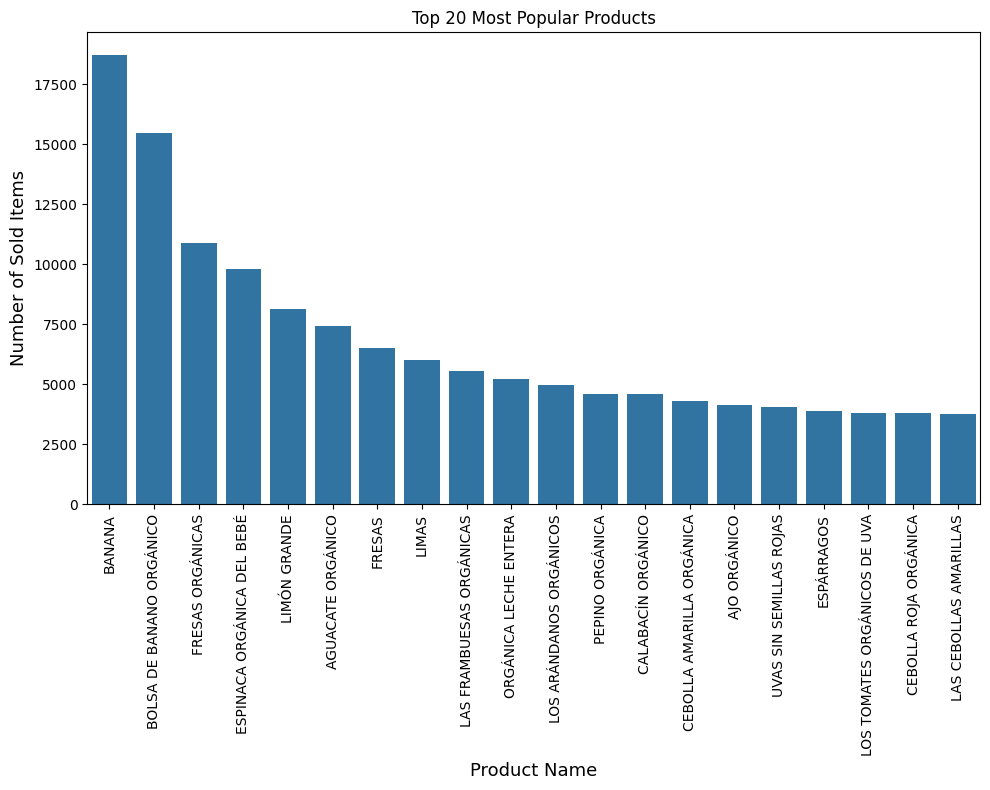

In [30]:
#Plotting the top 20 most sold products
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='vertical')
sns.barplot(x='product', y='count', data=most_popular_products[:20]
)
plt.ylabel('Number of Sold Items', fontsize=13)
plt.xlabel('Product Name', fontsize=13)
plt.title('Top 20 Most Popular Products')
plt.tight_layout()
plt.show()

In [31]:
#Counting number of unique Products per Department

products_per_department = merged_orders[['departamento','nombre_producto']].groupby('departamento', as_index=False).nunique()

products_per_department.columns =['departamento','unique_products']

print("Number of Products per Department", '\n')
products_per_department.sort_values('unique_products', ascending=False)

Number of Products per Department 



,departamento,unique_products
14,MERIENDAS,4950
4,CUIDADO PERSONAL,4269
6,DESPENSA,4014
0,BEBIDAS,3469
3,CONGELADOS,3378
10,HUEVOS Y LÁCTEOS,2942
7,FAMILIAR,2299
19,PRODUCTOS ENLATADOS,1671
17,PASTAS Y PRODUCTOS SECOS,1496
9,FRUTAS Y VERDURAS,1495


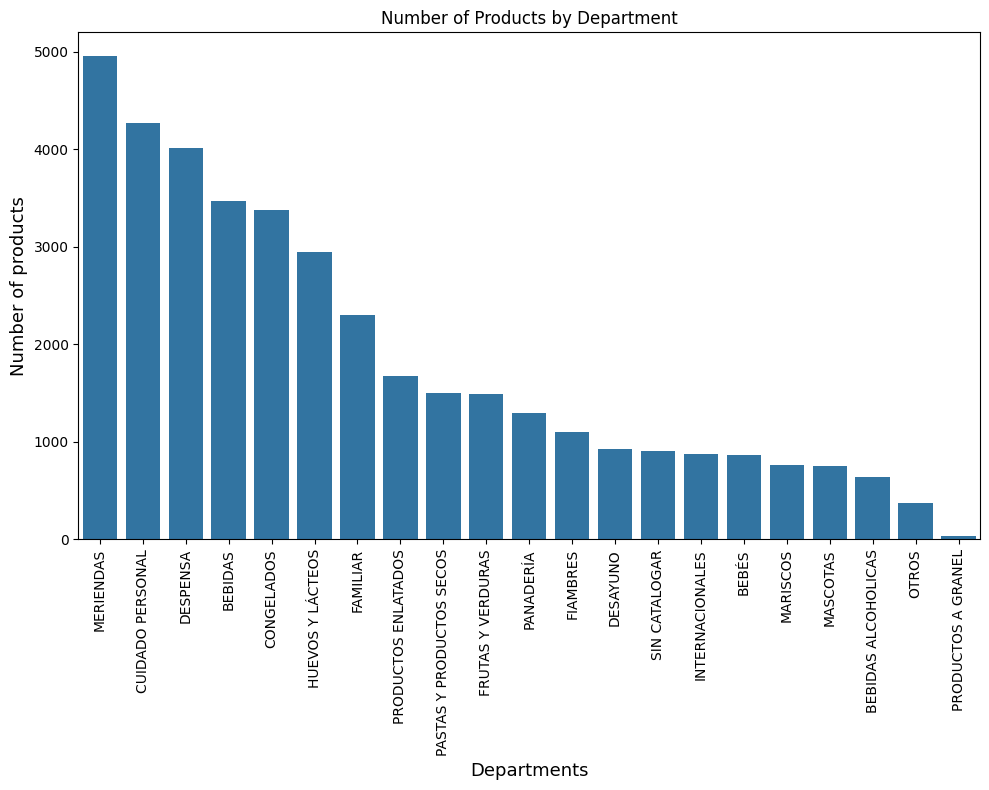

In [32]:
#Plotting the number of products by department
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='vertical')
sns.barplot(x='departamento', y='unique_products', data=products_per_department.sort_values('unique_products', ascending=False))
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.title('Number of Products by Department')
plt.tight_layout()
plt.show()

In [33]:
#Most popular departments
most_popular_departments = merged_orders['departamento'].value_counts().reset_index()
most_popular_departments.columns =['department', 'count']

most_popular_departments

,department,count
0,FRUTAS Y VERDURAS,400928
1,HUEVOS Y LÁCTEOS,216562
2,MERIENDAS,117935
3,BEBIDAS,113133
4,CONGELADOS,99448
5,DESPENSA,80919
6,PANADERÍA,48200
7,PRODUCTOS ENLATADOS,46216
8,FIAMBRES,43057
9,PASTAS Y PRODUCTOS SECOS,38502


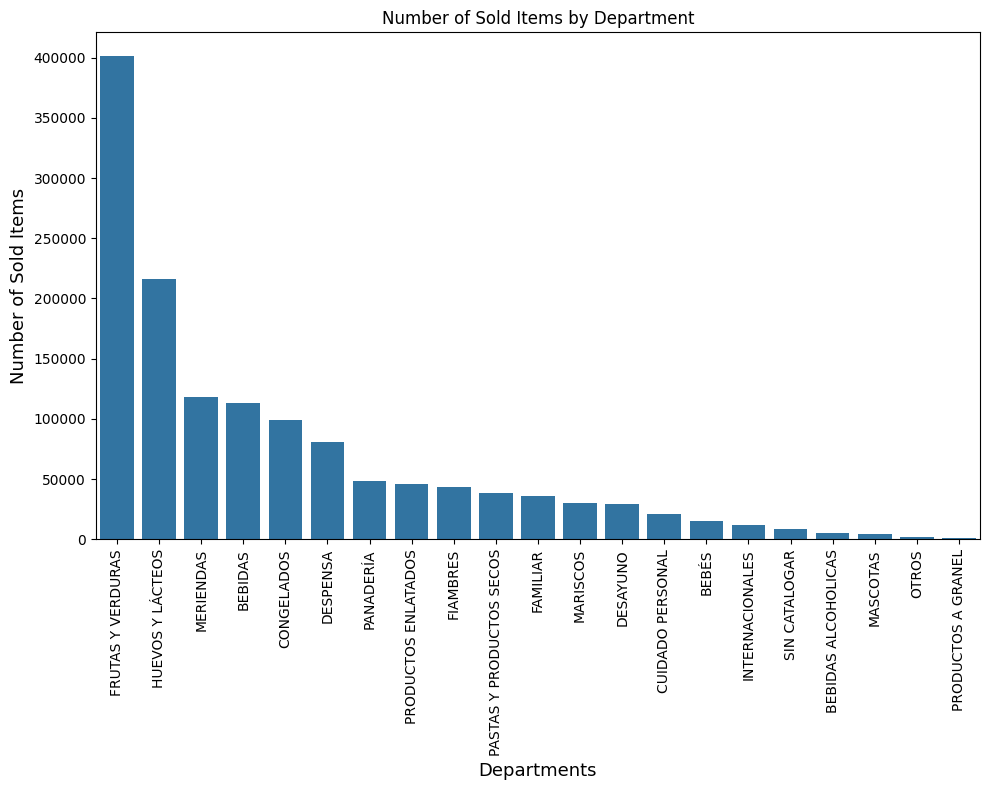

In [34]:
#Plotting the number of sold products by department
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='vertical')
sns.barplot(x='department', y='count', data=most_popular_departments)
plt.ylabel('Number of Sold Items', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.title('Number of Sold Items by Department')
plt.tight_layout()
plt.show()

In [35]:
#Counting number of unique Products per Pasillo

products_per_pasillo = merged_orders[['pasillo','nombre_producto']].groupby('pasillo', as_index=False).nunique()

products_per_pasillo.columns =['pasillo','unique_products']

products_per_pasillo.sort_values('unique_products', ascending=False)

,pasillo,unique_products
52,DULCES Y CHOCOLATES,937
120,SIN CLASFICAR,901
133,YOGUR,893
64,HELADOS,892
33,CHIPS DE GALLETAS SALADAS,828
...,...,...
70,JUGO CONGELADO,36
110,PRODUCTOS ENVASADOS,31
63,GRANOS A GRANEL,25
0,ACCESORIOS PARA BEBÉS,21


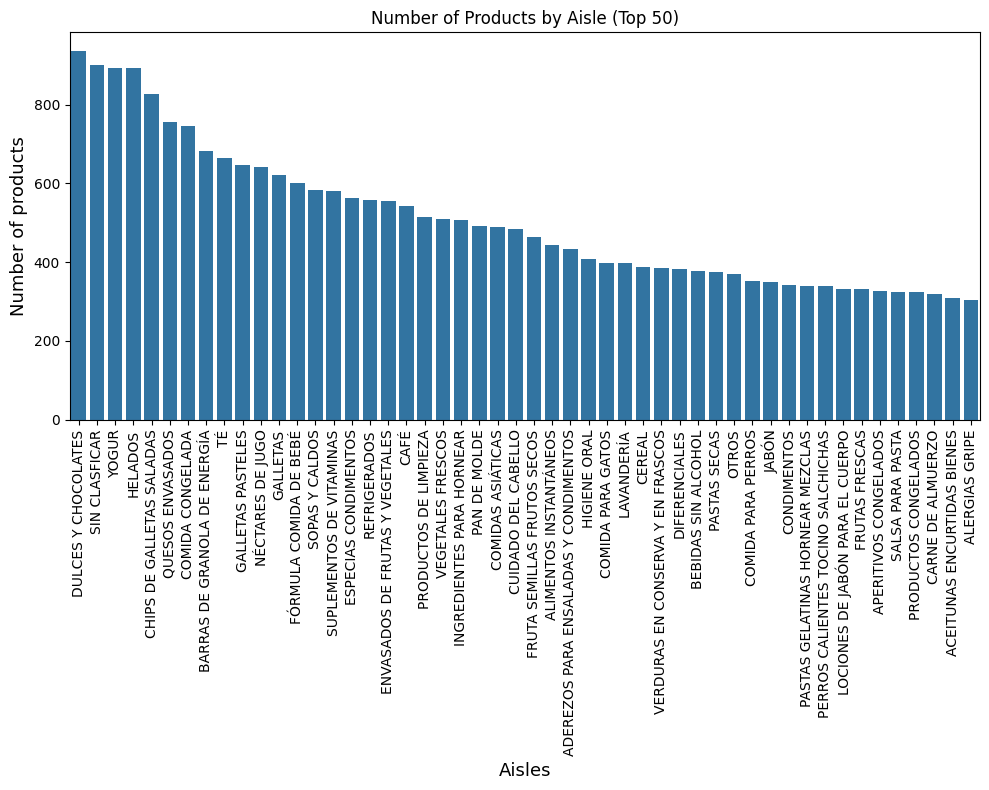

In [36]:
#Plotting the number of products by aisle
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='vertical')
sns.barplot(x='pasillo', y='unique_products', data=products_per_pasillo.sort_values('unique_products', ascending=False)[:50])
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.title('Number of Products by Aisle (Top 50)')
plt.tight_layout()
plt.show()

In [37]:
#Most popular aisles(pasillos)

most_popular_aisles = merged_orders['pasillo'].value_counts().reset_index()
most_popular_aisles.columns = ['aisle', 'count']

most_popular_aisles[:20]

,aisle,count
0,VEGETALES FRESCOS,150100
1,FRUTAS FRESCAS,143180
2,ENVASADOS ​​DE FRUTAS Y VEGETALES,78137
3,YOGUR,55219
4,QUESOS ENVASADOS,41495
5,SELTZER AGUA Y AGUA CON GAS,36503
6,LECHES,32642
7,CHIPS DE GALLETAS SALADAS,30679
8,BEBIDAS VEGETALES Y SIN LACTOSA,26224
9,PAN DE MOLDE,23557


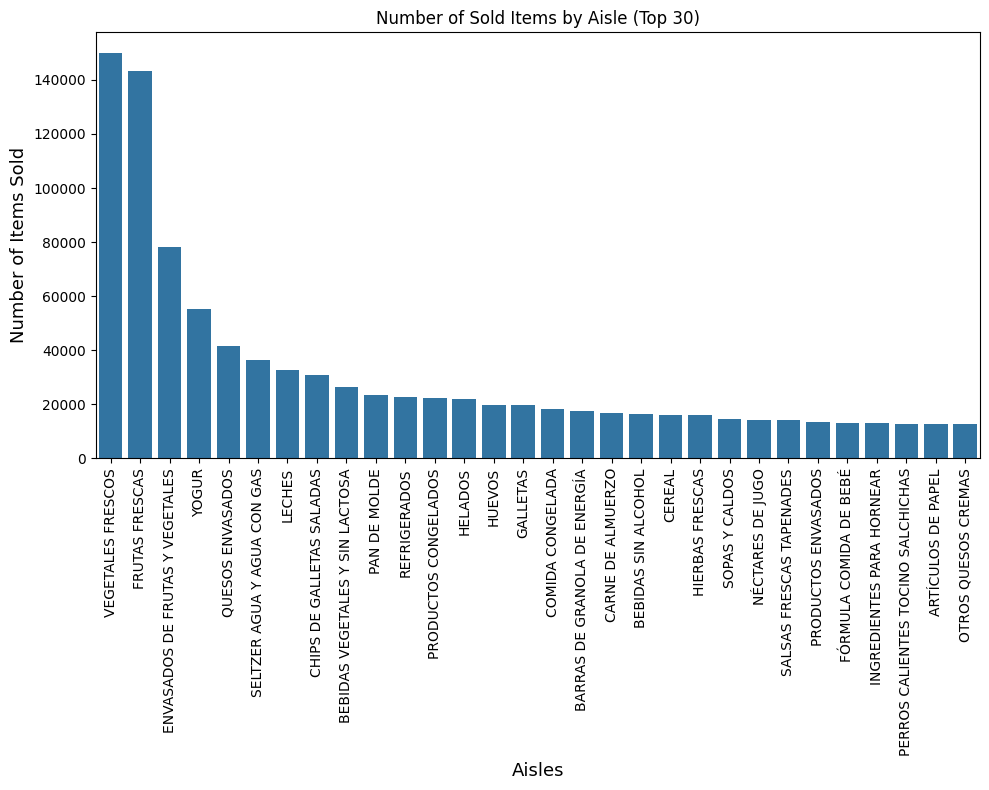

In [38]:
#Plotting the number sold items by aisle
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='vertical')
sns.barplot(x='aisle', y='count', data=most_popular_aisles[:30])
plt.ylabel('Number of Items Sold', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.title('Number of Sold Items by Aisle (Top 30)')
plt.tight_layout()
plt.show()

## 2.1 Reordered Items & Categories

In [39]:
#filtering for reordered items
reordered_items = merged_orders[merged_orders['reordenado'] == 1]

#Most popular re-ordered products
most_popular_reordered_products = reordered_items['nombre_producto'].value_counts().reset_index()
most_popular_reordered_products.columns = ['product', 'count']


most_popular_reordered_products[:20]

,product,count
0,BANANA,16557
1,BOLSA DE BANANO ORGÁNICO,13362
2,FRESAS ORGÁNICAS,8603
3,ESPINACA ORGÁNICA DEL BEBÉ,8055
4,AGUACATE ORGÁNICO,6226
5,LIMÓN GRANDE,5923
6,FRESAS,4786
7,ORGÁNICA LECHE ENTERA,4425
8,LAS FRAMBUESAS ORGÁNICAS,4279
9,LIMAS,4234


In [40]:
#Most popular re-ordered categories
most_popular_reordered_dept = reordered_items['departamento'].value_counts().reset_index()
most_popular_reordered_dept.columns = ['department', 'count']

most_popular_reordered_dept

,department,count
0,FRUTAS Y VERDURAS,265323
1,HUEVOS Y LÁCTEOS,146187
2,BEBIDAS,74537
3,MERIENDAS,68585
4,CONGELADOS,55670
5,PANADERÍA,30561
6,DESPENSA,29407
7,FIAMBRES,26699
8,PRODUCTOS ENLATADOS,22498
9,PASTAS Y PRODUCTOS SECOS,18797


In [41]:
#Most popular re-ordered ailes (pasillo)
most_popular_reordered_aisle = reordered_items['pasillo'].value_counts().reset_index()
most_popular_reordered_aisle.columns = ['aisle', 'count']

most_popular_reordered_aisle[:20]

,aisle,count
0,FRUTAS FRESCAS,104740
1,VEGETALES FRESCOS,91096
2,ENVASADOS ​​DE FRUTAS Y VEGETALES,51275
3,YOGUR,37925
4,SELTZER AGUA Y AGUA CON GAS,26931
5,LECHES,25863
6,QUESOS ENVASADOS,24776
7,CHIPS DE GALLETAS SALADAS,18303
8,BEBIDAS VEGETALES Y SIN LACTOSA,18034
9,PAN DE MOLDE,16023


In [42]:
#Grouping by reorderd and counting frequency of occurrences
grouped = merged_orders.groupby("reordenado", as_index=False)["id_producto"].count()

#renaming columns
grouped.columns=['reordered', 'Total_products']

#calculating ratio of reordered products.
grouped['Ratios'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped

,reordered,Total_products,Ratios
0,0,550990,0.402271
1,1,818709,0.597729


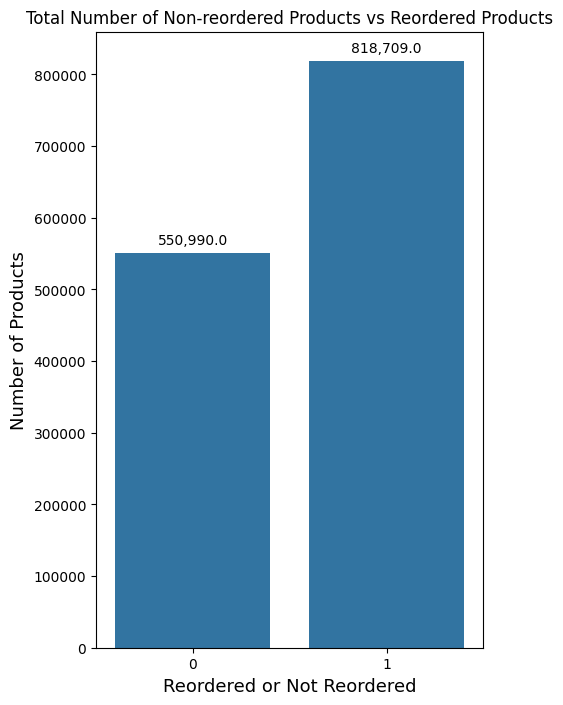

In [43]:
# Plotting the bar chart with labels on top
f, ax = plt.subplots(figsize=(5, 8))
barplot = sns.barplot(x='reordered', y='Total_products', data=grouped)
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered or Not Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Number of Non-reordered Products vs Reordered Products')

# Adding labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), ','),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.show()

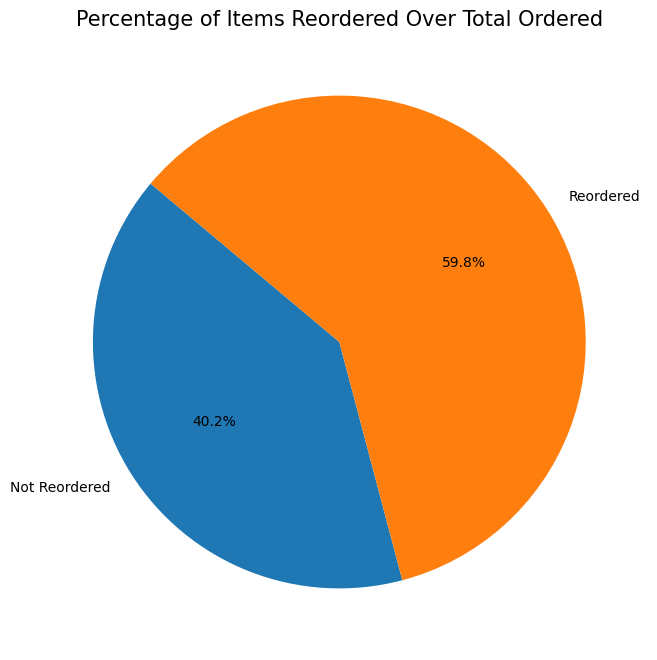

In [44]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped['Total_products'], labels=['Not Reordered', 'Reordered'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Items Reordered Over Total Ordered', fontsize=15)
plt.show()

We notice that almost 60% of the products sold have been ordered in the past.

In [45]:
#Grouping by product_id and adding number of reorders and total number of orders for each product
grouped = merged_orders.groupby("id_producto", as_index=False)["reordenado"].agg(['sum', 'count'])

#renaming columns
grouped.columns = ['product_id', 'reorder_sum', 'reorder_total' ]

#calculating probability of reordering each product.
grouped['reorder_probability'] = grouped['reorder_sum'] / grouped['reorder_total']

#merging with product dataframe to add the product name
grouped = pd.merge(grouped, products[['id_producto', 'nombre_producto']], how='left', left_on='product_id', right_on='id_producto')

#filtering for products that have been ordered over 100 times. Sorting by reorder_probability and limiting to 20 results
grouped = grouped[grouped.reorder_total > 100].sort_values(['reorder_probability'], ascending=False)[:20]

grouped

,product_id,reorder_sum,reorder_total,reorder_probability,id_producto,nombre_producto
16404,20940,336,368,0.913043,20940,ORGÁNICA LECHE BAJA EN GRASA
19429,24852,16557,18726,0.884172,24852,BANANA
100,117,106,120,0.883333,117,PETIT SUISSE DE FRUTA
30623,39180,426,483,0.881988,39180,ORGÁNICA BAJA EN GRASA 1% LECHE
9650,12384,237,269,0.881041,12384,ORGÁNICA SIN LACTOSA 1% LECHE BAJA EN GRASA
18813,24024,405,461,0.878525,24024,1% DE LECHE BAJA EN GRASA
30234,38689,1056,1206,0.875622,38689,REDUCCIÓN DE GRASA DE LECHE ORGÁNICA
4347,5514,109,125,0.872000,5514,ORGÁNICA HOMOGENEIZADA LECHE ENTERA
28165,36011,705,811,0.869297,36011,ORGÁNICA LECHE SIN GRASA
23007,29447,497,572,0.868881,29447,"LECHE, ORGÁNICA, VITAMINA D"


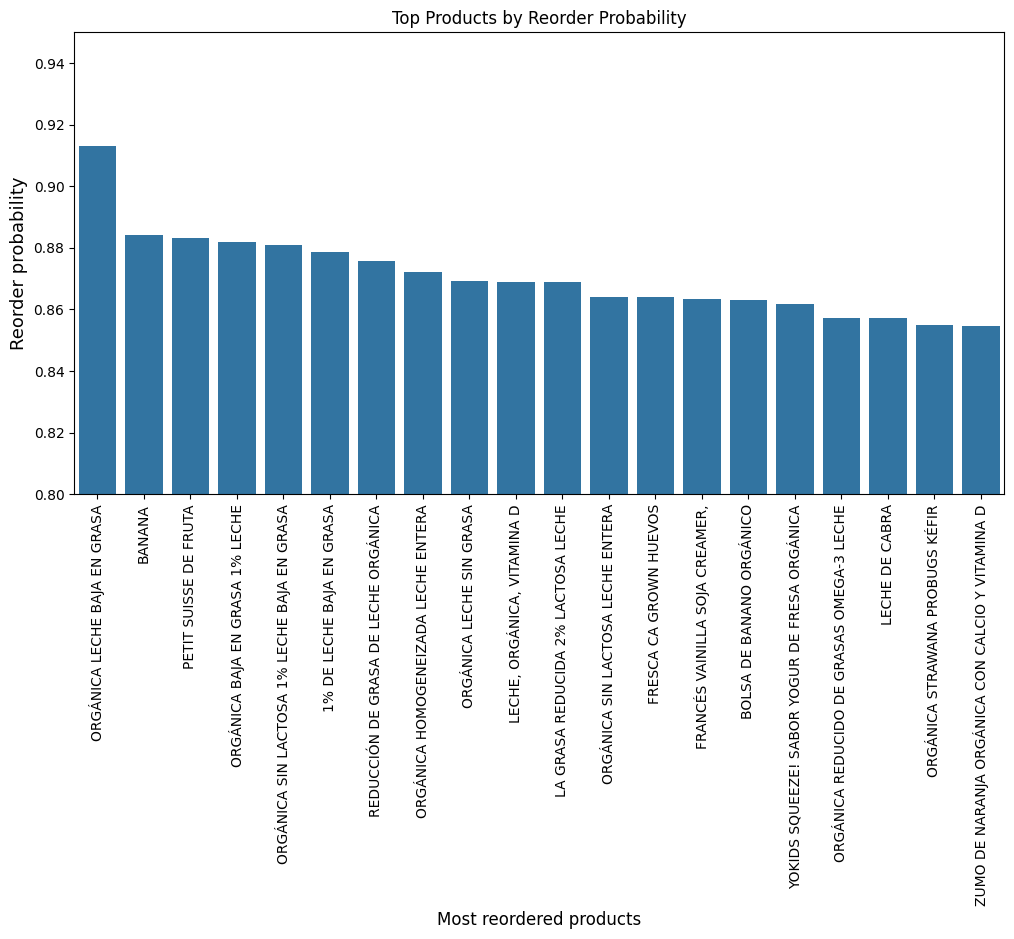

In [46]:
f, ax = plt.subplots(figsize=(12, 6))
plt.xticks(rotation='vertical')
sns.barplot(x='nombre_producto', y='reorder_probability', data=grouped)
plt.ylim([0.80,0.95])
plt.ylabel('Reorder probability', fontsize=13)
plt.xlabel('Most reordered products', fontsize=12)
plt.title('Top Products by Reorder Probability')
plt.show()

## 2.2 Distribution of Baskets

In [47]:
grouped_by_order = merged_orders.groupby('id_orden', as_index=False).agg(total_items=('id_orden' , 'count'))

grouped_by_order.head(5)

,id_orden,total_items
0,1,7
1,36,8
2,38,9
3,96,7
4,98,49


In [48]:
#Distribution of the total_items per order.
grouped_by_order[['total_items']].describe()

,total_items
count,131153.000000
mean,10.443520
std,7.852346
min,1.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,79.000000


The **average basket contains 10.4 items** and a standard deviation of 7.8.

The **minimum number of items is 1** with a **maximum of 79 items**.

In [85]:
#Calculating Kurtosis and Skewness of the Distribution of number of items per basket
print(f"Kurtosis: {grouped_by_order[['total_items']].kurtosis().round(2)}")
print(f"Skweness: {grouped_by_order[['total_items']].skew().round(2)}")

Kurtosis: total_items    3.32
dtype: float64
Skweness: total_items    1.48
dtype: float64


A positive skewness indicates a **right-skewed distribution**, meaning most baskets will have a smaller quantity of items.

- The right tail (higher values) is longer than the left tail.
- The bulk of the values (including the median) lie to the left of the mean.
- The mean is greater than the median.
- There are relatively few high values that stretch the tail to the right.


A kurtosis value of 3.32 suggests a **leptokurtic distribution**.

- This means that the data have heavier tails and a sharper peak than a normal distribution.
- Heavier Tails: There are more extreme values or outliers.
- Sharper Peak: Most of the data are concentrated around the mean, leading to a higher peak.

Based on the distribution of the number of items in the basket we'll consider the median as a more accurate measure of central tendency.

In [78]:
#Calculating the median number of items per basket
median_items_per_basket = grouped_by_order[['total_items']].median()
median_items_per_basket

total_items    9.0
dtype: float64

The **median number of item per basket is 9 items**.

Below we'll plot the distribution of number of items per basket.

In [49]:
# Counting the number of items per basket
grouped_by_number_of_orders = grouped_by_order['total_items'].value_counts().reset_index()
grouped_by_number_of_orders.columns = ["number_of_products", "number_of_orders"]

grouped_by_number_of_orders

,number_of_products,number_of_orders
0,5,8981
1,6,8848
2,7,8616
3,4,8343
4,3,8126
...,...,...
72,79,1
73,68,1
74,67,1
75,69,1


<ipython-input-74-bb65c2802c91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_by_number_of_orders, x="number_of_products", y="number_of_orders", palette = 'viridis', ax=ax)


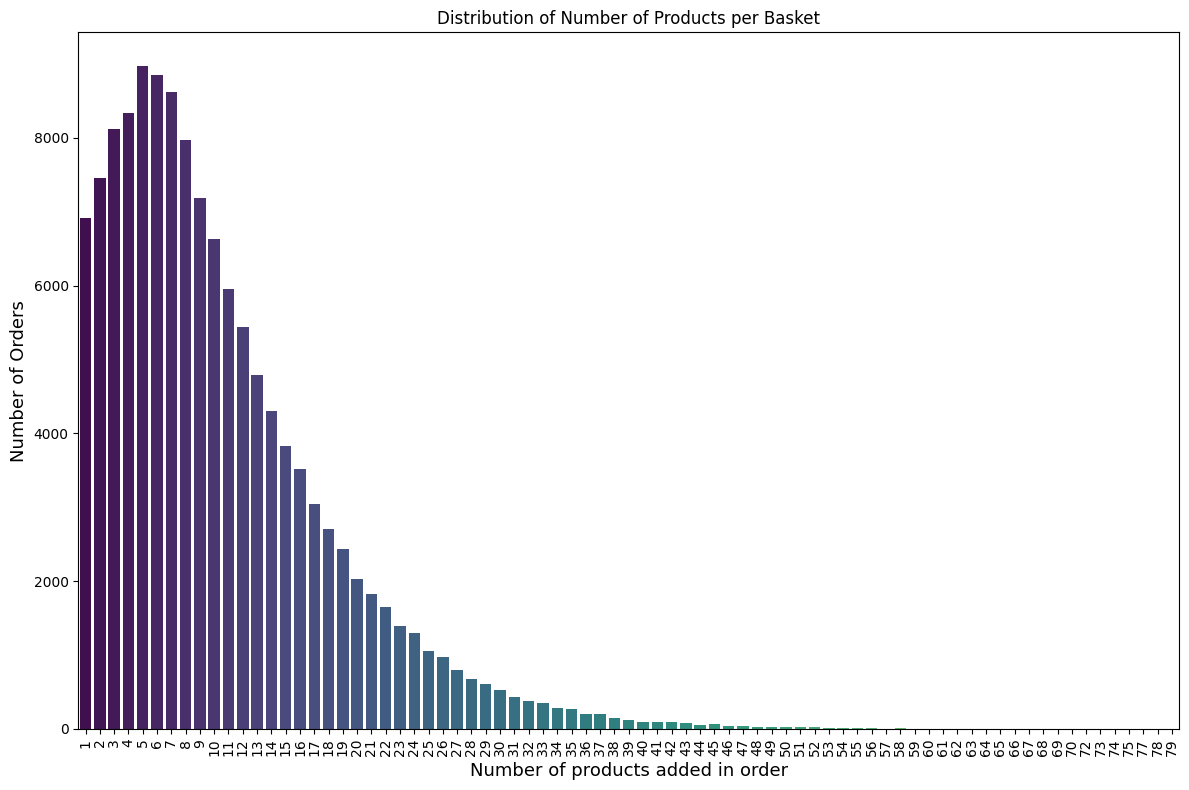

In [74]:

# Distribution Number of items per basket
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=grouped_by_number_of_orders, x="number_of_products", y="number_of_orders", palette = 'viridis', ax=ax)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.title('Distribution of Number of Products per Basket')
plt.tight_layout()
plt.show()

## 2.3 Additional Insights

### **Exploring most popular words in the product's names:**

By exploring the words in the product's names we can extract valuable attributes than we can then use for comparing products.

We use the library `nltk` to remove stopwords (words than don't have special value) and count the frequency of the remaining words.

We will save the extracted words in a dataframe to analyze them.

Additionaly we will plot them as a wordcloud for a quick visualization.

In [51]:
#Exploring a Word map from the Product dataset:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the Spanish stopwords
stop_words = set(stopwords.words('spanish'))

# Tokenize the words in 'nombre_producto' and remove stopwords
words = ' '.join(products['nombre_producto']).split()
filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

# Create a word frequency map
word_map = Counter(filtered_words)

# Display the word map
print(word_map)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Counter({'orgánica': 3149, 'chocolate': 2375, 'queso': 2104, 'salsa': 1667, 'pollo': 1416, 'original': 1251, 'leche': 1165, 'crema': 1099, 'galletas': 1059, 'natural': 1044, 'orgánico': 1042, 'mezcla': 1041, 'yogur': 1024, 'té': 1000, 'mantequilla': 990, 'grasa': 981, 'vainilla': 940, 'sabor': 884, 'arroz': 882, 'aceite': 880, 'jugo': 817, 'azúcar': 804, 'gluten': 803, 'coco': 802, 'pan': 789, 'pasta': 749, 'sal': 738, 'limón': 737, 'café': 737, 'carne': 712, 'fresa': 690, '100%': 684, '&': 681, 'dulce': 679, 'negro': 669, 'blanco': 664, 'cheddar': 664, 'sopa': 653, 'agua': 618, 'verde': 612, 'estilo': 593, 'oscuro': 583, 'menta': 581, 'ajo': 581, 'bar': 571, 'caramelo': 559, 'grano': 539, 'miel': 539, 'maíz': 525, 'asado': 515, 'patatas': 515, 'chips': 496, 'naranja': 491, 'helado': 487, 'bebida': 474, 'trigo': 467, 'suave': 461, 'arándano': 460, 'avena': 460, 'pizza': 451, 'manzana': 447, 'mix': 441, 'frutas': 438, 'extra': 433, 'harina': 429, 'fruta': 427, 'libre': 424, 'tomate': 41

In [52]:
# Convert the word map dictionary to a DataFrame
word_map_df = pd.DataFrame.from_dict(word_map, orient='index', columns=['Frequency'])

# Sort the DataFrame by frequency in descending order
word_map_df = word_map_df.sort_values(by='Frequency', ascending=False)

# Display the DataFrame
word_map_df.head(20)

,Frequency
orgánica,3149
chocolate,2375
queso,2104
salsa,1667
pollo,1416
original,1251
leche,1165
crema,1099
galletas,1059
natural,1044


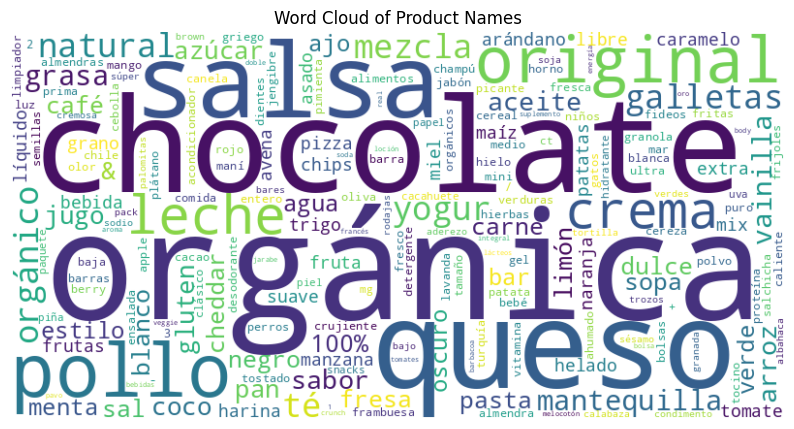

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the word map to a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_map)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Product Names')
plt.axis('off')
plt.show()

The Word Cloud gives us additional insights on the products' customer purchase. For example, we see that organic products are popular. Same with chocolates.

## 2.4 Feature Engineering

- Creating new attributes from the product's name to enrich the dataset.

####**Feature Engineering Variables:**

As analyzed in the previous steps, we've identified different words that can serve as attributes to enhance the data and further differentiate each product.

We've identified attributes related to the product's origin, type, lifestyle choice, diet type, price segment, etc.....

Based on these attributes we create a dictionary containing the words associated to each attribute. A subsequent step is to create boolean features: if the word is present then we assign a `True` as opposed to a `False` if not present.

Finally, we have a matrix for each product containing 1s and 0s for each possible attribute.


In [54]:
#Merging products, department and pasillo datasets:

product_and_aisle_df = products.merge(department, how='left', on='id_departamento'). \
                merge(pasillo, how='left', on='id_pasillo')

#Dropping unnecessary columns:
product_and_aisle_df = product_and_aisle_df.drop(columns=['id_producto', 'id_pasillo', 'id_departamento'], axis=1)

In [55]:
##Extra Features based on product attributes:
conditions = {
    'diet': 'LIGHT|BAJO|LOWFAT',
    'organic': 'ORGÁNICO|ORGÁNICA|ORGÁNICAS|ORGÁNICOS|ORGÁNICO|ORGANIC|ORGANICO|ECOLÓGICO|ECOLOGICO',
    'gluten_free': 'SIN GLUTEN|GLUTEN FREE',
    'vegetarian': 'VEGETARIANO|VEGETARIAN',
    'vegan': 'VEGAN|VEGANO',
    'paleo': 'PALEO',
    'no_gmo': 'NO GMO|NON GMO|GLUTEN FREE',
    'imported': 'IMPORTADO|IMPORTADA|IMPORTED',
    'premium': 'PREMIUM|LUJO|EXCLUSIVO|PRIMERA CALIDAD',
    'sales':'OFERTA|OFERTAS',   #10 records
    'descafeinado':'DESCAFEINADO',  #103 records
    'french':'FRANCÉS|FRANCES',   #368 RECORDS
    'italian': 'ITALIA|ITALIANO|ITALIANIA|ITALIAN|ITALY'
}


##NOTE: WE CAN ANALYZE WHICH OTHER ATTRIBUTES TO INCLUDE TO FURTHER DIFFERENTIATE PRODUCTS.

In [56]:
# Iterate over the conditions and create new columns
for col_name, condition in conditions.items():
    product_and_aisle_df[col_name] = product_and_aisle_df['nombre_producto'].str.contains(condition.upper(), case=False).astype(int)

In [57]:
product_and_aisle_df.head()

,nombre_producto,departamento,pasillo,diet,organic,gluten_free,vegetarian,vegan,paleo,no_gmo,imported,premium,sales,descafeinado,french,italian
0,GALLETAS DEL EMPAREDADO DEL CHOCOLATE,MERIENDAS,GALLETAS PASTELES,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TODAS ESTACIONES DE SALT,DESPENSA,ESPECIAS CONDIMENTOS,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ROBUSTA DE ORO SIN AZÚCAR TÉ OOLONG,BEBIDAS,TÉ,0,0,0,0,0,0,0,0,0,0,0,0,0
3,SALSA INTELIGENTES ONES FAVORITOS MINI CLÁSICO...,CONGELADOS,COMIDA CONGELADA,0,0,0,0,0,0,0,0,0,0,0,0,0
4,EN CUALQUIER MOMENTO SALSA VERDE CHILE,DESPENSA,PREPARACIÓN DE LA CARNE MARINADOS,0,0,0,0,0,0,0,0,0,0,0,0,0


We'll now explore one of the newly created features for insights. For example, we'll pick the 'Organic Products' as we've identified these products to be  popular products for SuperCenter's customers.

In [87]:
#Subsetting for 'organic' products:
product_and_aisle_df_organic = product_and_aisle_df[product_and_aisle_df['organic'] == 1]

print(f'Subsetting the dataframe for organic products. We have a total of {len(product_and_aisle_df_organic)} organic products')

Subsetting the dataframe for organic products. We have a total of 4965 organic products


In [59]:
#Summary Statistics of 'organic' products:

print('Summary Statistics of organic products:', '\n')
product_and_aisle_df_organic.describe().T

Summary Statistics of organic products: 



,count,mean,std,min,25%,50%,75%,max
diet,4965.0,0.010473,0.101812,0.0,0.0,0.0,0.0,1.0
organic,4965.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
gluten_free,4965.0,0.014099,0.117910,0.0,0.0,0.0,0.0,1.0
vegetarian,4965.0,0.006042,0.077505,0.0,0.0,0.0,0.0,1.0
vegan,4965.0,0.002417,0.049108,0.0,0.0,0.0,0.0,1.0
paleo,4965.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
no_gmo,4965.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
imported,4965.0,0.000403,0.020068,0.0,0.0,0.0,0.0,1.0
premium,4965.0,0.004230,0.064904,0.0,0.0,0.0,0.0,1.0
sales,4965.0,0.000201,0.014192,0.0,0.0,0.0,0.0,1.0


By exploring the summary statistics for each new attribute created we can see if there are **opportunities to add new products** to the **supermarket's selection.**

For example, we notice there are no products labeled as 'organic' and 'paleo' as the max value for the paleo column is 0. Same with no_gmo.

Doing a quick research we find out that people following paleo diets are very selective on the foods they eat. Offering them organic & paleo products could be an opportunity to exploit.

Iterating over the newly created attributes (and new ones we could create) can help identify unmet customer and/or market demands.



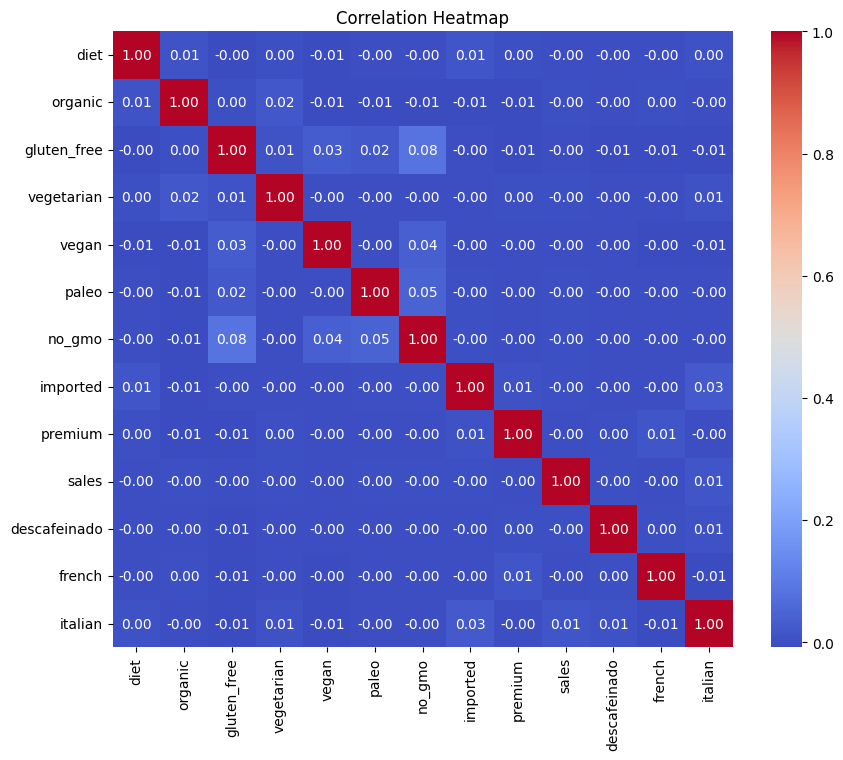

In [95]:
#subsetting for only numerical variables
numerical_df = product_and_aisle_df.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **3. Baseline Product Recommendation**

## **3.1 Baseline Product Recommendation #1:  Counting Pairs of Products:**

We'll run a basic product recommendation that will serve as a baseline to compare to our final solutions.

Our baseline solution will consider recommendations of the most commonly paired products.

While we are not taking in any information about the person purchasing, and do not even know any details about the product, valuable recommendations can still be made by examining what groups of products are purchased by similar people.

We will examine the products often purchased by the same people that purchased a given product, and then use this data to give a recommendation to someone who just purchased a product.

**Advantages:**

- Simple solution when we don't have many attributes or user details.

**Disadvantages:**
- As we are just counting pairs of items and proposing to the user the most frequent pair, we enter in a loop. Users will purchase the proposed items and reinforcing the frequency of these pairs.

**Use Cases:**
- We can use this strategy to identify the most frequently items purchased together to create product bundles.
- A product bundle is a set of products that are sold together. Usually at a discount compared to purchasing them separately.
- Bundles are convenient as the user can purchase them together in just one click saving time and therefore increasing the UX(user experience). Improving UX is correlated to customer loyalty. A loyal customer will purchase more frequently, with a higher CLV (customer lifetime value), increasing its value to the company.  


In [88]:
from itertools import permutations

# Create the function to find all permutations
def find_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['product_a', 'product_b'])
  return pairs

In [89]:
# Apply the function to the title column and reset the index
product_combinations = merged_orders.groupby('id_orden')['nombre_producto'].apply(find_pairs).reset_index(drop=True)

In [90]:
# Printing first few rows of product combinations
product_combinations.head()

,product_a,product_b
0,EL YOGUR DE BULGARIA,4% ORGÁNICO QUESO GRASA DE LECHE LECHE ENTERA ...
1,EL YOGUR DE BULGARIA,CORAZONES DE APIO ORGÁNICOS
2,EL YOGUR DE BULGARIA,KIRBY PEPINO
3,EL YOGUR DE BULGARIA,LAS SARDINAS LIGERAMENTE AHUMADO EN ACEITE DE ...
4,EL YOGUR DE BULGARIA,BOLSA DE BANANO ORGÁNICO


In [91]:
# Calculate how often each item in product_a occurs with the items in product_b
combination_counts = product_combinations.groupby(['product_a', 'product_b']).size()

# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()

In [92]:
#Inspecting the frequency of pair of products
combination_counts_df.head()

,product_a,product_b,size
0,# 2 FILTROS DE CAFÉ,1% DE GRASA DE LECHE,1
1,# 2 FILTROS DE CAFÉ,100% DE PAPEL RECICLADO TOALLAS,2
2,# 2 FILTROS DE CAFÉ,100% PAN DE TRIGO ENTERO,1
3,# 2 FILTROS DE CAFÉ,100% PURA CALABAZA,1
4,# 2 FILTROS DE CAFÉ,100% RECICLADO ROLLO 2 CAPAS DE TOALLAS DE PAP...,1


In [93]:
# Printing a random sample order to extract a product named which we'll inspect to see which products are similar
merged_orders.sample(5)

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,departamento,pasillo
1311652,1311652,3240047,46061,4,1,PALOMITAS DE MAIZ,23.0,19.0,MERIENDAS,PALOMITAS
102847,102847,253329,35072,33,1,LECHUGA DE MANTEQUILLA ORGÁNICA VERDE,123.0,4.0,FRUTAS Y VERDURAS,ENVASADOS ​​DE FRUTAS Y VEGETALES
536673,536673,1318792,7879,10,0,"QUESO AMERICANO, PRE-REBANADO",2.0,16.0,HUEVOS Y LÁCTEOS,QUESOS DE ESPECIALIDAD
301388,301388,733834,2425,9,0,CHUNK LIGHT DE ATÚN EN AGUA,95.0,15.0,PRODUCTOS ENLATADOS,MARISCOS CARNE ENLATADA
662116,662116,1628968,22556,5,1,TODO NATURAL ALBARICOQUE AGUA CON GAS,115.0,7.0,BEBIDAS,SELTZER AGUA Y AGUA CON GAS


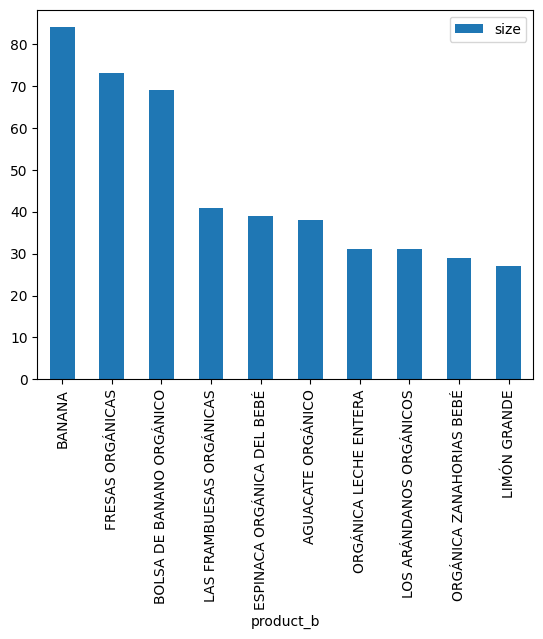

In [94]:
# Sort the counts from highest to lowest
combination_counts_df.sort_values('size', ascending=False, inplace=True)

# Find the top 10 products most frequently purchased by people who purchase 'CHOCOLATE ORGÁNICO VIRUTA CHEWY GRANOLA BARS'
example_df = combination_counts_df[combination_counts_df['product_a'] == 'CHOCOLATE ORGÁNICO VIRUTA CHEWY GRANOLA BARS'][:10]

# Plot the results
example_df.plot.bar(x="product_b")
plt.show()

As we can see, these recommendations are not very accurate as they will display in most cases the most frequent products (ex. Bananas).

We might be able to find a couple of valuable combinations of products but this approach will be time consuming.


## **3.2 Baseline Product Recommendation #2: Content-Based Recommendation:**

We'll use attributes to build profiles of items in a way that allow us to mathematically compare them.

We encode each item as a vector. Each item as row and each attribute as a binary feature.

**Advantages:**
- As the recommendations are based on the item attributes rather than user feedback, recommendations can be made on never-before-purchased products.
- Content-based models are ideal for creating recommendations for products that have no user feedback data such as reviews or purchases.
- As we don't have user_id it helps us solve the issue by proposing products of similar attributes.

**Disadvantages:**
- Computationally expensive.
- Doesn't consider user profiles for personalization.




**One-hot encoding variables:**

In [96]:
#dummy_pasillo = pd.get_dummies(product_and_aisle_df['pasillo']).astype(int)  #For now we don't use the aisle info as we have +100 variables

#One-Hot encoding the 'department' dataframe to use them as product attributes:
dummy_departamento = pd.get_dummies(product_and_aisle_df['departamento']).astype(int)


# Concatenate the dummy variables with the original DataFrame
product_and_aisle_df_encoded = pd.concat([product_and_aisle_df, dummy_departamento], axis=1)


In [97]:
#dropping categorical columns
product_and_aisle_df_encoded = product_and_aisle_df_encoded.drop(columns=['departamento', 'pasillo'], axis=1)

In [98]:
# we now have a DF that includes the created attributes and department information as columns
product_and_aisle_df_encoded.head(1)

,nombre_producto,diet,organic,gluten_free,vegetarian,vegan,paleo,no_gmo,imported,premium,...,INTERNACIONALES,MARISCOS,MASCOTAS,MERIENDAS,OTROS,PANADERÍA,PASTAS Y PRODUCTOS SECOS,PRODUCTOS A GRANEL,PRODUCTOS ENLATADOS,SIN CATALOGAR
0,GALLETAS DEL EMPAREDADO DEL CHOCOLATE,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Now that we have the matrix with all attributes we can calculate similarities between products.

In [99]:
#Setting 'nombre_producto' as index
product_and_aisle_df_encoded.set_index('nombre_producto', inplace=True)

**Example:**

We'll explore similarity of products based on their jaccard score. As an example, we'll take SIN GLUTEN PALEO FETTUCINE and compare it to different products.

In [100]:
from sklearn.metrics import jaccard_score

#Example nr1: we compare the jaccard score to measure how similar two products are.
#A score of 0 means no similarity with 1 being very similar.

product_1_example = product_and_aisle_df_encoded.loc['SIN GLUTEN PALEO FETTUCCINE']
product_2_example = product_and_aisle_df_encoded.loc['ARROZ CRUJIENTE DE CHOCOLATE OSCURO BAR']
print(f'Jaccard Score for Example #1: {jaccard_score(product_1_example, product_2_example)}', '\n')

#Example nr2:
product_4_example = product_and_aisle_df_encoded.loc['ALMENDRA PALEO PAN SIN GLUTEN NO GMO']
print(f'Jaccard Score for Example #2: {jaccard_score(product_1_example, product_4_example)}', '\n')

#Example nr3:
product_5_example = product_and_aisle_df_encoded.loc['SIN GLUTEN PALEO GNOCCHI']
print(f'Jaccard Score for Example #3: {jaccard_score(product_1_example, product_5_example)}', '\n')

Jaccard Score for Example #1: 0.0 

Jaccard Score for Example #2: 0.4 

Jaccard Score for Example #3: 1.0 



As we can see in above example, by measuring the jaccard score we can identify products that share similar attributes.  The higher the score the higher the similarity.



- 'SIN GLUTEN PALEO FETTUCCINE' is not similar to 'ARROZ CRUJIENTE...' (score = 0.0).  
- 'SIN GLUTEN PALEO FETTUCCINE' is slightly similar to 'ALMENDRA PALEO PAN SIN GLUTEN NO GMO' (score = 0.4) as they are both PALEO and SIN GLUTEN products.
-  'SIN GLUTEN PALEO FETTUCCINE' is highly similar to 'SIN GLUTEN PALEO GNOCCHI' (score = 1.0) as they are both PALOE, SIN GLUTEN and from the same DEPARTMENT.


####**Finding the distance between all products:**

Now it's time to calculate the jaccard distance between all products.

We'll use two functions:

- pdist = pair wise distance using jaccard --> condensed matrix with all distance in 1d array. Uses jaccard distance: a measure to compare how distance each value is from each other.

- square form --> convert 1d array into square form



In [101]:
##subsetting products so SESSION DOESN'T CRASH.
# ANALYZE IF WE CALCULATE SIMILARITY FOR PRODUCTS THAT SELL BETTER ONLY.

In [102]:
from scipy.spatial.distance import pdist, squareform

#calculating jaccard distance for all products
#jaccard_distances = pdist(product_and_aisle_df_encoded.values, metric='jaccard')

#subsetting the df to calculate distances and not crashing the session. 20k products
product_and_aisle_df_encoded_SUBSET = product_and_aisle_df_encoded[:20000]

jaccard_distances = pdist(product_and_aisle_df_encoded_SUBSET.values, metric='jaccard')

In [103]:
#Converting matrix to rectangular form
square_jaccard_distances = squareform(jaccard_distances)

In [104]:
#we previously calculated the jaccard distance (how different 2 products are), we substract by 1 to get the similarity
jaccard_similarity_array = 1 -  square_jaccard_distances

In [105]:
#creating a dataframe including all product's and their similarity scores.

#NOTE: this is the subset DF (20k products)

distance_df = pd.DataFrame(jaccard_similarity_array,
                            index= product_and_aisle_df_encoded_SUBSET.index,
                            columns= product_and_aisle_df_encoded_SUBSET.index)


In [106]:
distance_df.head(2)

nombre_producto,GALLETAS DEL EMPAREDADO DEL CHOCOLATE,TODAS ESTACIONES DE SALT,ROBUSTA DE ORO SIN AZÚCAR TÉ OOLONG,SALSA INTELIGENTES ONES FAVORITOS MINI CLÁSICO RIGATONI CON VODKA CREAM,EN CUALQUIER MOMENTO SALSA VERDE CHILE,ACEITE NARIZ SECA,PURA AGUA DE COCO CON NARANJA,CUT RUSSET POTATOES STEAM N' MASH,LUZ FRESA ARÁNDANO YOGUR,ESPUMOSO JUGO DE NARANJA Y PERA CON PÚAS BEBIDAS,...,SUAVIZAR SUPER PERAS PERAS PERAS PURÉ 1 (DE 4 MESES),FRAGMENTOS SALADOS CON TURQUÍA Y MENUDILLOS EN SALSA DE COMIDA PARA GATOS,PAQUETE ORGÁNICA CAMPESINO PAN,SURTIDO DE NUDILLO DEL DEDO Y FLEXIBLE TELA VENDAJES,REVISTA ELLE DECOR,POLLO SOPA DE FIDEOS RTS CLÁSICO,BULBOS DEL AJO ORGÁNICO,TODOS 100% DE BLANCOS DE HUEVO NATURAL,HABANERO ASADO GARBANZOS SNACKS MEDIO PICANTE,ZANAHORIA PRENSADO ANIMADO
nombre_producto,,,,,,,,,,,,,,,,,,,,,
GALLETAS DEL EMPAREDADO DEL CHOCOLATE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
TODAS ESTACIONES DE SALT,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
#Inspecting the most similar products to 'SIN GLUTEN PALEO FETTUCCINE'
print('Similar Products to: SIN GLUTEN PALEO FETTUCCINE', '\n')
print(distance_df['SIN GLUTEN PALEO FETTUCCINE'].sort_values(ascending=False)[1:15])

Similar Products to: SIN GLUTEN PALEO FETTUCCINE 

nombre_producto
SIN GLUTEN NATURALMENTE DELICIOSO GRANO ENTERO WAFFLES    0.666667
SIN GLUTEN MERCADO CARNE PICANTE Y BEAN ENCHILADA         0.666667
SIN GLUTEN LLANURA DE TORTILLA                            0.666667
PECHUGA DE POLLO NUGGETS SIN GLUTEN                       0.666667
SIN GLUTEN SIN CURAR TOCINO BURRITO                       0.666667
SIN GLUTEN ARROZ CORTEZA DUO PIZZA DE QUESO               0.666667
SIN GLUTEN JARDÍN LASAÑA DE VERDURAS                      0.666667
SIN GLUTEN FUEGO ASADO PIZZA VEGETAL                      0.666667
SIN GLUTEN POLLO TIKKA MASALA                             0.666667
SIN GLUTEN POLLO FLORENTINA                               0.666667
SIN GLUTEN AHUMADO Y QUESO GOUDA MAC                      0.666667
SIN GLUTEN ARÁNDANO AVENA MUFFIN TOPS                     0.666667
SIN GLUTEN PAN DE GRANO ENTERO                            0.666667
SIN GLUTEN RISOTTO DE HONGOS TAZÓN                        0.66

This baseline content based recommendation solution, can provide better product suggestions than previous solution.

However, as we see from the results we have many suggestions with similar similaroty scores. There is not enough differentiation between products so we would need to include more attributes to do so. This would increase even further the computational resources needed.  

# **4. Conclusion & Next Steps**




In the following notebooks we'll create **customer segments** by doing **clustering and social network analysis**. Customer segmentation and profiling can help **customize the product recommendations based on similar users and preferences**.


For our **recommendation solutions, we'll introduce embeddings**. An embedding is a relatively low-dimensional vector into which you can translate high-dimensional vectors. Ideally, an embedding captures some of the semantics of the input by placing semantically similar inputs close together in the embedding space. This will allow for **more accurate recommendations**.


We'll also use **Google's latest Multimodal Large Language Model (LLM), Gemini**. Using Generative AI will allow us to create new information on the products which will be useful in our recommendations.  



